Price data: (181, 9)
Steel finance: (255, 44)
⚠️ Warning: No explicit date/time column found. Using first column as Date.
✅ Merged data shape: (182, 47)
✅ Panel created with shapes: {'Level': (182, 47), 'Log': (182, 47), 'Return': (182, 47), 'YoY': (182, 47)}


/tmp/ipython-input-948823801.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df_numeric.resample(freq).mean()
/tmp/ipython-input-948823801.py:78: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_df = merged.pct_change() * 100
/tmp/ipython-input-948823801.py:81: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy_df = merged.pct_change(12) * 100 if FREQ == 'M' else merged.pct_change(252) * 100


Level                                                   \
           Đơn vị: USD % Thay đổi Lần cuối   = 26301.5 VND          Năm   
Date                                                                      
1970-01-31         NaN        NaN      NaN NaN     NaN NaN  2018.882353   
2010-11-30       160.5     0.0881      NaN NaN     NaN NaN          NaN   
2010-12-31       168.3     0.0486      NaN NaN     NaN NaN          NaN   
2011-01-31       179.6     0.0671      NaN NaN     NaN NaN          NaN   
2011-02-28       187.2     0.0423      NaN NaN     NaN NaN          NaN   

                                                                              \
                  Kỳ TÀI SẢN NGẮN HẠN (đồng) Tiền và tương đương tiền (đồng)   
Date                                                                           
1970-01-31  2.470588            1.533395e+13                    1.845497e+12   
2010-11-30       NaN                     NaN                             NaN   
2010-12-31       NaN                     NaN                             NaN   
2011-01-31       NaN                     NaN                             NaN   
2011-02-28       NaN                     NaN                             NaN   

            ...                    YoY_change  \
            ... Vốn góp của chủ sở hữu (đồng)   
Date        ...                                 
1970-01-31  ...                           NaN   
2010-11-30  ...                           NaN   
2010-12-31  ...                           NaN   
2011-01-31  ...                           NaN   
2011-02-28  ...                           NaN   

                                                    \
           Vay và nợ thuê tài chính dài hạn (đồng)   
Date                                                 
1970-01-31                                     NaN   
2010-11-30                                     NaN   
2010-12-31                                     NaN   
2011-01-31                                     NaN   
2011-02-28                                     NaN   

                                                     \
           Người mua trả tiền trước ngắn hạn (đồng)   
Date                                                  
1970-01-31                                      NaN   
2010-11-30                                      NaN   
2010-12-31                                      NaN   
2011-01-31                                      NaN   
2011-02-28                                      NaN   

                                                                               \
           Vay và nợ thuê tài chính ngắn hạn (đồng) Lợi thế thương mại (đồng)   
Date                                                                            
1970-01-31                                      NaN                       NaN   
2010-11-30                                      NaN                       NaN   
2010-12-31                                      NaN                       NaN   
2011-01-31                                      NaN                       NaN   
2011-02-28                                      NaN                       NaN   

                                                                 \
           Trả trước dài hạn (đồng) Tài sản dài hạn khác (đồng)   
Date                                                              
1970-01-31                      NaN                         NaN   
2010-11-30                      NaN                         NaN   
2010-12-31                      NaN                         NaN   
2011-01-31                      NaN                         NaN   
2011-02-28                      NaN                         NaN   

                                                                              
           Phải thu dài hạn khác (đồng) Phải thu dài hạn (đồng) Các quỹ khác  
Date                                                                          
1970-01-31                          NaN                     NaN          NaN  
2010-1

<Figure size 1000x500 with 0 Axes>

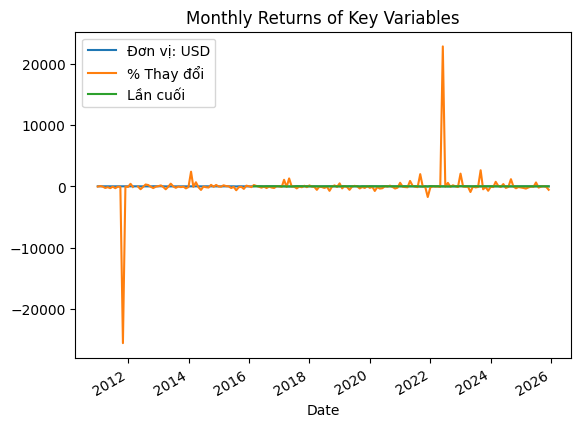

In [ ]:
# --- SETUP ---
!pip install openpyxl pandas numpy matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- LOAD DATA ---
# (1) Đọc file Excel giá nguyên liệu
price_raw = pd.read_excel('/content/Giá Nguyên Liệu.xlsx')

# (2) Đọc dữ liệu báo cáo tài chính
steel_finance = pd.read_excel('/content/bao_cao_tai_chinh.xlsx')

# (3) Nếu có file dữ liệu vĩ mô sau này, chỉ cần mở comment dòng sau:
# macro = pd.read_csv('/content/Du_lieu_vi_mo.csv')

# --- INSPECT ---
print("Price data:", price_raw.shape)
print("Steel finance:", steel_finance.shape)
# print("Macro:", macro.shape)  # Uncomment nếu đã có macro data


# --- STANDARDIZE DATE COLUMNS ---
def fix_date(df):
    # Xác định cột ngày tháng
    date_cols = [c for c in df.columns if isinstance(c, str) and ('date' in c.lower() or 'time' in c.lower() or 'ngày' in c.lower())]

    if len(date_cols) == 0:
        print("⚠️ Warning: No explicit date/time column found. Using first column as Date.")
        df['Date'] = pd.to_datetime(df.iloc[:, 0], errors='coerce')
        df = df.drop(df.columns[0], axis=1)
    else:
        df['Date'] = pd.to_datetime(df[date_cols[0]], errors='coerce')
        if df[date_cols[0]].name != 'Date':
            df = df.drop(date_cols[0], axis=1)

    df = df.dropna(subset=['Date'])
    df = df.sort_values('Date')
    return df[['Date'] + [c for c in df.columns if c != 'Date']]


price = fix_date(price_raw)
steel = fix_date(steel_finance)
# macro = fix_date(macro)  # Uncomment nếu có macro


# --- RESAMPLE / ALIGN FREQUENCY ---
FREQ = 'M'  # 'M' = monthly, 'D' = daily

def resample_data(df, freq=FREQ):
    df = df.set_index('Date').sort_index()
    df_numeric = df.select_dtypes(include=np.number)
    return df_numeric.resample(freq).mean()

price = resample_data(price)
steel = resample_data(steel)
# macro = resample_data(macro)


# --- MERGE ---
merged = price.join(steel, how='outer', rsuffix='_steel')
# merged = merged.join(macro, how='outer', rsuffix='_macro')
merged = merged.sort_index()

print("✅ Merged data shape:", merged.shape)


# --- NORMALIZATION & TRANSFORMATION ---
# 1. Log-transform (chỉ áp dụng cho các cột dương)
log_df = merged.copy()
for col in log_df.select_dtypes(include=np.number).columns:
    if (log_df[col] > 0).all():
        log_df[col] = np.log(log_df[col])

# 2. Return (MoM hoặc DoD)
return_df = merged.pct_change() * 100

# 3. YoY Change (12 kỳ nếu monthly, 252 nếu daily)
yoy_df = merged.pct_change(12) * 100 if FREQ == 'M' else merged.pct_change(252) * 100


# --- COMBINE INTO PANEL ---
panel = pd.concat(
    {
        'Level': merged,
        'Log': log_df,
        'Return': return_df,
        'YoY_change': yoy_df
    },
    axis=1
)

# --- OUTPUT ---
print("✅ Panel created with shapes:", {k: v.shape for k, v in {'Level': merged, 'Log': log_df, 'Return': return_df, 'YoY': yoy_df}.items()})
display(panel.head())

# --- OPTIONAL VISUALIZATION ---
plt.figure(figsize=(10,5))
panel['Return'].iloc[:, :3].plot(title='Monthly Returns of Key Variables')
plt.show()
